# Assignment 4 | Data set 1 | Online News Sharing 

### Clustering Algorithms:

1. K-means
2. Expectation Maximization

### Dimensionality reduction algorithms

1. Any one feature selection algorithm (decision tree, forward selection, backward elimination, etc.)
2. PCA
3. ICA
4. Randomized Projections

### Experimentations:

1. ANN with Dimensionality reduction

### Submitted By :

Animesh Kansal

# <font color='red'> # Task 1 </font> 


# Importing Necessary Libraries

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [12]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [13]:
df = pd.read_csv("OnlineNewsPopularity.csv")

# Dropping non - predictive attributes

In [14]:
df = df.drop(["url"," timedelta"],axis = 1)

In [15]:
median = df[' shares'].median()
df[' shares']= np.where(df[' shares']>=median, 1,0)

In [16]:
cols = df.shape[1]
#X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:cols-1],df.iloc[:,cols-1:cols],test_size=0.2,random_state=0)

In [17]:
import seaborn as sns

# Without using Dimentionality reduction technique, these are the type of clusters. that will be formed.  As we can see. 

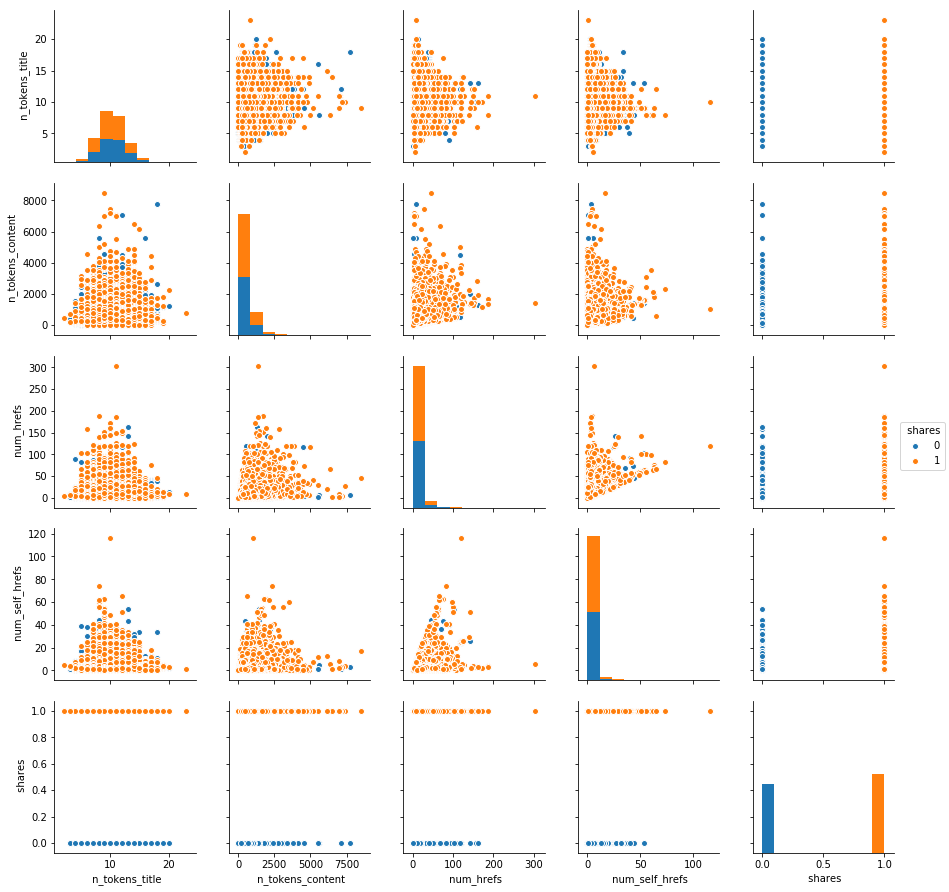

In [18]:
sns.pairplot(df[[' n_tokens_title', ' n_tokens_content', ' num_hrefs',' num_self_hrefs',' shares']],hue=' shares')

# Creating K- Means object with n_clusters = 2 , 

# Because we have divided "number of shares" into small and large based on the median value

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=2,random_state=0)
X = sc.fit_transform(df.iloc[:,:cols-1])

In [21]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [22]:
kmeans.cluster_centers_


array([[-7.65454001e-03,  3.57952139e-02,  4.77300332e-03,
         5.84981124e-03,  6.47579407e-03,  2.95994907e-02,
         2.62988504e-02,  2.37038658e-03,  3.39843796e-03,
         1.65424286e-01, -4.52439104e-03,  4.74958398e-03,
         6.44112311e-04,  1.15918107e-02,  6.26795142e-03,
         1.33274961e-02, -4.74827735e-04,  8.70342935e-03,
        -4.55627175e-03, -4.51885033e-04, -7.43309947e-03,
        -9.40620504e-03, -3.02781149e-02, -1.34453979e-02,
        -1.12687894e-02, -2.60691640e-02,  6.23352146e-03,
         7.57737682e-03,  8.05938691e-03,  4.59602734e-04,
         9.70835957e-05, -4.79478834e-04,  1.18825174e-04,
         4.32801521e-04, -1.13237565e-03,  2.07075870e-04,
        -6.53186529e-04,  1.34269139e-02,  1.93838609e-03,
         3.05543645e-03, -3.22169490e-02,  1.62197109e-02,
         1.17035674e-01,  3.80279019e-02,  7.01110497e-02,
         4.72138486e-02,  1.10607350e-01,  5.65230453e-02,
         1.04397029e-01,  4.12730220e-02,  9.42195409e-0

In [23]:
predictions = kmeans.fit_predict(X)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(df[' shares'],predictions))

[[17994   496]
 [20462   692]]


# Every time, if the accuracy is less than 50% , I will predict the opposite results, i.e. 1 to 0 and vice versa,

# Because prediction can not go below 50% for a binary output

In [26]:
acc= round(100*accuracy_score(df[' shares'],predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(df[' shares'],predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 52.87 %


#  Expectation Maximization | Gaussian Mixture 

In [27]:
from sklearn.mixture import GaussianMixture

In [28]:
#kmeans = KMeans(n_clusters=2,random_state=0)
Gaussian = GaussianMixture(n_components=2,random_state=0, )#covariance_type='tied')

In [54]:
X = df.iloc[:,:cols-1]
X = sc.fit_transform(X)
Gaussian.fit(X)


predictions = Gaussian.predict(X)
probs = Gaussian.predict_proba(X)

In [27]:
print(confusion_matrix(df[' shares'],predictions))

[[13991  4499]
 [18353  2801]]


In [28]:
acc= round(100*accuracy_score(df[' shares'],predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(df[' shares'],predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 57.64 %


# <font color='red'> Task 2 & Task 3 </font> 


# Dimentionality Reduction

# 1.) Feature Selection

# I am using Decision Tree to get the top 20 features

X =df.iloc[:,:cols-1]
y = df.iloc[:,:cols-1:cols]
clf = ExtraTreesClassifier()

clf = clf.fit(X, y)

clf.feature_importances_  
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

Text(0,0.5,'Gini importance')

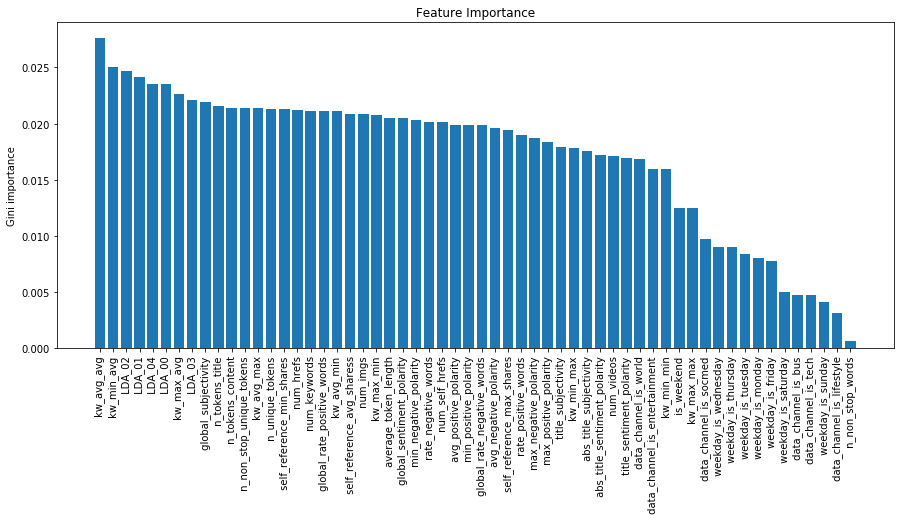

In [39]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

X =df.iloc[:,:cols-1]
y = df.iloc[:,cols-1:cols]
model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())


dict_features = {}
for i in range(len(model.feature_importances_)):
    dict_features.update({df.iloc[:,:cols-1].columns[i]:100*model.feature_importances_[i]})
indices = np.argsort(model.feature_importances_)[::-1]


plt.bar(range(X.shape[1]),model.feature_importances_[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.title("Feature Importance")
plt.ylabel("Gini importance")

# Selecting top 20 attributes

In [40]:
top_20_attribures = []
count = 1
for i in indices:
    if count < 21:
        top_20_attribures.append(X.columns[i])
        count+=1
    else:
        break

# Running K-means after Feature Selection

In [41]:
kmeans = KMeans(n_clusters=2,random_state=0)

In [42]:
kmeans.fit(df[top_20_attribures])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [43]:
predictions = kmeans.predict(df[top_20_attribures])

In [47]:
confusion_matrix(df[' shares'],predictions)

array([[12349,  6141],
       [13339,  7815]])

In [48]:
acc= round(100*accuracy_score(df[' shares'],predictions),2)

if acc < 50:
    predictions = np.where(predictions == 0, 1,0)
    
acc= round(100*accuracy_score(df[' shares'],predictions),2)

print("Accuracy =", acc,"%")

Accuracy = 50.86 %


# 2.) Feature Transformation

# --  PCA 

In [145]:
from sklearn.decomposition import PCA

# For Visualizing Clusters, taking PCA = 2 

# Clearly shows , no overlapping in Clusters, Clusters are Exclusive

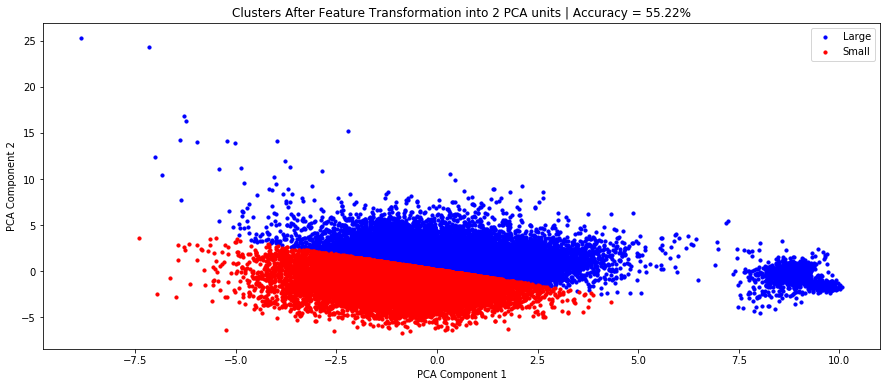

In [146]:


kmeans = KMeans(n_clusters=2,random_state=0)



X = df.iloc[:,:cols-1]

    # Scaling

X = sc.fit_transform(X)

pca = PCA(n_components=2)

X = pca.fit_transform(X)

kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

acc= round(100*accuracy_score(df[' shares'],y_kmeans),2)

if acc < 50:
    y_kmeans = np.where(y_kmeans == 0, 1,0)
    
acc= round(100*accuracy_score(df[' shares'],y_kmeans),2)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'blue', label = 'Large')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'red', label = 'Small')
plt.title("Clusters After Feature Transformation into 2 PCA units | Accuracy = {}%".format(acc))
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

__________________
___


# Principal Components Vs Explained Variance

In [148]:

#PCA
var = []
for i in range(58):
    X = df.iloc[:,:cols-1]

    # Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X)

    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X_train)
    ex_var  = pca.explained_variance_ratio_
    var.append(np.sum(ex_var))

Text(0,0.5,'Variance Explained')

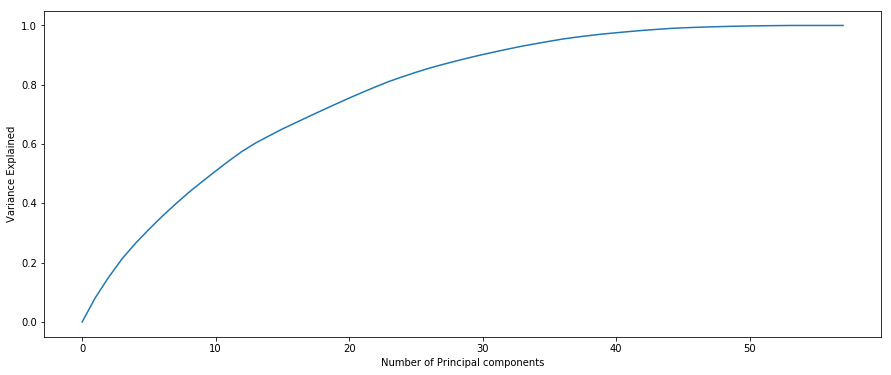

In [52]:
plt.plot(var)
plt.xlabel("Number of Principal components")
plt.ylabel("Variance Explained")
#plt.xticks(range(58))

# So we will choose 20 principal components, as percentage of variance explained ~ 0.75

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

kmeans = KMeans(n_clusters=2,random_state=0)


# Running K means 10 times, But Accuracy is almost simmilar , Max ~ 58.17 %

(0, 100)

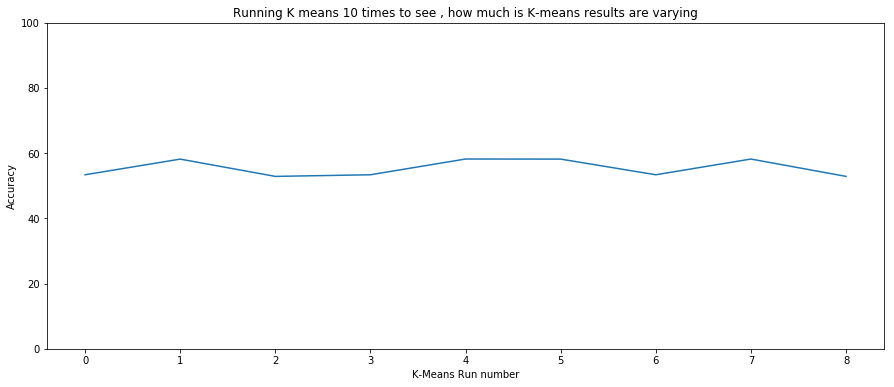

In [147]:
acc = []
for i in range(1,10):
    
    X = df.iloc[:,:cols-1]

    # Scaling

    X_train = sc.fit_transform(X)

    pca = PCA(n_components=20)
    
    X_train = pca.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    acc1= round(100*accuracy_score(df[' shares'],predictions),2)

    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(df[' shares'],predictions),2)

    acc.append(acc1)
plt.plot(acc)
plt.ylabel("Accuracy")
plt.title("Running K means 10 times to see , how much is K-means results are varying")
plt.xlabel("K-Means Run number")
plt.ylim(0,100)

# -- ICA

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

kmeans = KMeans(n_clusters=2,random_state=0)
from sklearn.decomposition import FastICA


# As observed, ICA won't result in diffrent K-Means clusters for given number of components , 
# Hence, experimenting with Number of ICA components to find max accuracy at n_components = 26,  Acc = 53%


In [74]:
acc = []
for i in range(1,58):
    
    X = df.iloc[:,:cols-1]

    # Scaling

    X_train = sc.fit_transform(X)


    ica = FastICA(n_components=i)
    X_train = ica.fit_transform(X_train)
    #X_train = ica.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    
    acc1= round(100*accuracy_score(df[' shares'],predictions),2)

    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(df[' shares'],predictions),2)


    acc.append(acc1)


/Users/animeshkansal/anaconda/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Text(0.5,1,'Independent Components Vs Accuracy')

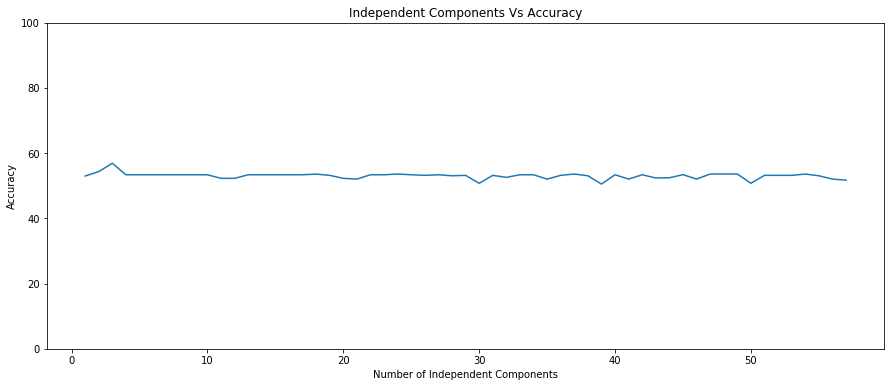

In [75]:
plt.plot(range(1,58),acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(0,100)
plt.xlabel("Number of Independent Components")
plt.title("Independent Components Vs Accuracy")

# -- RP 

# It is showing max Acc =  59.14% at 42 Random Projections

In [76]:
from sklearn import random_projection

In [77]:
acc = []
for i in range(1,58):

    X = df.iloc[:,:cols-1]

    # Scaling

    X_train = sc.fit_transform(X)


    transformer = random_projection.SparseRandomProjection(n_components=i)
    X_train = transformer.fit_transform(X_train)
    #X_train = ica.fit_transform(X_train)

    kmeans.fit(X_train)

    predictions = kmeans.predict(X_train)
    
    acc1= round(100*accuracy_score(df[' shares'],predictions),2)
    
    if acc1 < 50:
        predictions = np.where(predictions == 0, 1,0)
    
    acc1= round(100*accuracy_score(df[' shares'],predictions),2)


    acc.append(acc1)



Text(0.5,1,'Random Projections Vs Accuracy')

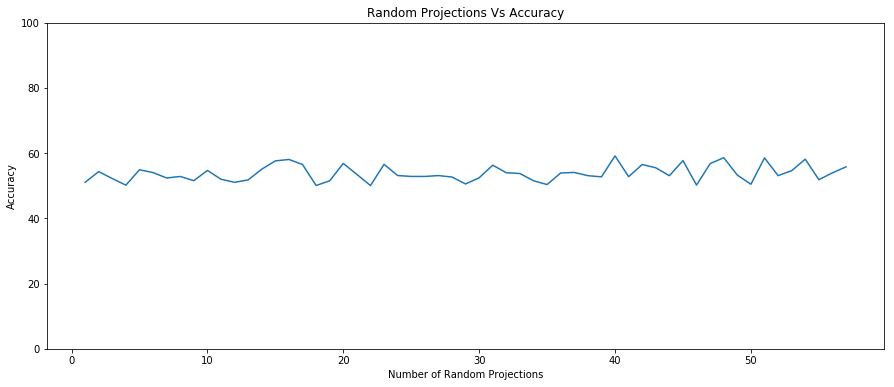

In [78]:
plt.plot(range(1,58),acc)
plt.ylabel("Accuracy")
plt.title("")
plt.ylim(0,100)
plt.xlabel("Number of Random Projections")
plt.title("Random Projections Vs Accuracy")

1. Run the clustering algorithms on your datasets and describe your observations (with plots).
2. Apply the dimensionality reduction algorithms on your datasets and describe your observations (with plots).
3. Run the clustering algorithms again, this time after applying dimensionality reduction. Describe the difference compared to previous experimentation (with plots).
4. Run your neural network learner from assignment 3 on the data after dimensionality reduction (from task 2). Explain and plot your observations (error rates, etc.)
5. Use the clustering results from task 1 as the new features and apply neural network learner on this new data consisting of only clustering results as features and class label as the output.


# Task 4

# PCA then Neural Network 

In [10]:

X = df.iloc[:,:cols-1]
y = df.iloc[:,cols-1:cols]
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)

pca = PCA(n_components=20)
X_train = pca.fit_transform(X)


In [13]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
NNclassifier = Sequential()

In [14]:

# Adding the input layer and the first hidden layer
NNclassifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 20))

# Adding the second hidden layer
NNclassifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu'))

# Adding the output layer
NNclassifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
NNclassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
NNclassifier.fit(X_train, y, batch_size = 10, nb_epoch = 20)

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=20, units=10, kernel_initializer="uniform")`
  app.launch_new_instance()
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
39644/39644 [==============================] - 7s 187us/step - loss: 0.7060 - acc: 0.5788

# <font color ='red' > Task 5 </font>

# I used Cluster labels from k-means and probabilities from EM and ran into ANN

In [51]:
kmeans = KMeans(n_clusters=2,random_state=0)
X = sc.fit_transform(df.iloc[:,:cols-1])

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [52]:
predictions_KMeans = kmeans.predict(X)

In [55]:
Gaussian.fit(X)

predictions = Gaussian.predict(X)
probs_EM = Gaussian.predict_proba(X)

In [102]:
new_Df = pd.DataFrame()
data = pd.DataFrame({"KM_Pred": predictions_KMeans,"EM_Prob": probs_EM[:,1],"NoOfShares": df[' shares']})
new_Df=new_Df.append(data)


In [106]:
new_Df.head()

,EM_Prob,KM_Pred,NoOfShares
0,2.414014e-38,0,0
1,2.948302e-98,0,0
2,1.667267e-107,0,1
3,1.670523e-33,0,0
4,0.000000e+00,0,0


In [136]:
X_train = new_Df.iloc[:,0:2]
y = new_Df.iloc[:,2:]

In [137]:
NNclassifier = Sequential()

# Adding the input layer and the first hidden layer
NNclassifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the second hidden layer
NNclassifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))

# Adding the output layer
NNclassifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
NNclassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
NNclassifier.fit(X_train, y, batch_size = 10, nb_epoch = 20)

/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=1, kernel_initializer="uniform")`
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1, kernel_initializer="uniform")`
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/Users/animeshkansal/anaconda/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
39644/39644 [==============================] - 6s 149us/step - loss: 0.6911 - acc: 0.5334

In [138]:
y_pred = NNclassifier.predict(X_train)
y_pred = (y_pred > 0.5)

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
confusion_matrix(y,y_pred)

array([[    0, 18490],
       [    0, 21154]])

In [142]:
acc= round(100*accuracy_score(df[' shares'],y_pred),2)

if acc < 50:
    y_pred = np.where(y_pred == 0, 1,0)
    
acc= round(100*accuracy_score(df[' shares'],y_pred),2)

print("Accuracy =", acc,"%")

Accuracy = 53.36 %
